## Import necessry packages

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Get data

In [58]:
if not os.path.isfile('housing.csv'):
    !wget -O housing.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

## read and preview dataset

In [59]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Does the target (housing_median_age) variable has a long tail

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

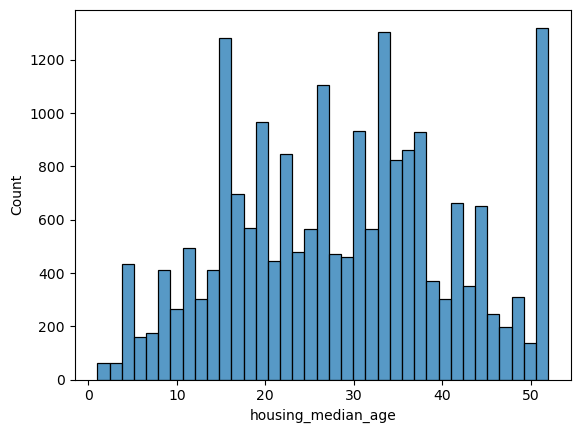

In [60]:
#no the housing_median_Age does not have a long tail
sns.histplot(housing_df.housing_median_age)

## Preparing the dataset

### First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [61]:
df = housing_df[housing_df.ocean_proximity.isin([ '<1H OCEAN', 'INLAND'])].reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Next, use only the following columns:

1. 'latitude',
1. 'longitude',
1. 'housing_median_age',
1. 'total_rooms',
1. 'total_bedrooms',
1. 'population',
1. 'households',
1. 'median_income',
1. 'median_house_value'

In [62]:
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df = df.copy()[columns]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### which feature has missing number?

In [63]:
df.columns[df.isnull().any()]

Index(['total_bedrooms'], dtype='object')

### What's the median (50% percentile) for variable 'population'?

In [64]:
df.population.describe()['50%']

1195.0

## Prepare and split data set
1. Shuffle the dataset (the filtered one you created above), use seed 42.
1. Split your data in train/val/test sets, with 60%/20%/20% distribution.
1. Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [65]:
np.random.seed(42)
idx = list(range(0, df.shape[0]))
np.random.shuffle(idx)

In [66]:
test_size = int(0.2 * df.shape[0])
val_size = int(0.2 * df.shape[0])
train_size = df.shape[0] - test_size - val_size

test_size + val_size + train_size, df.shape[0]

(15687, 15687)

In [67]:
df_train = df.iloc[:train_size].reset_index(drop=True)
df_val = df.iloc[train_size:train_size+val_size].reset_index(drop=True)
df_test = df.iloc[train_size+val_size:].reset_index(drop=True)

In [68]:
y_train = df_train['housing_median_age'].values
del df_train['housing_median_age']
y_train = np.log1p(y_train)

y_val = df_val['housing_median_age'].values
y_val = np.log1p(y_val)
del df_val['housing_median_age']

y_test = df_test['housing_median_age'].values
y_test = np.log1p(y_test)
del df_test['housing_median_age']

### Question 3
1. We need to deal with missing values for the column from Q1.
1. We have two options: fill it with 0 or with the mean of this variable.
1. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
1. For computing the mean, use the training only!
1. Use the validation dataset to evaluate the models and compare the RMSE of each option.
1. Round the RMSE scores to 2 decimal digits using round(score, 2)
1. Which option gives better RMSE? - `Both are equally good`

In [73]:
base = [
    'latitude',
    'longitude',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

In [74]:
def prepare_X(df, fillna_val=0):
    df = df.copy()
    df_num = df[base]
    df_num = df_num.fillna(fillna_val)
    X = df_num.values 
    return X

In [75]:
def train_linear_regression(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv).dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [76]:
def rmse(y_pred, y):
    se = (y_pred - y) ** 2
    return np.sqrt(np.mean(se))

In [82]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
score = rmse(y_pred, y_val)
round(score, 2)

0.57

In [83]:
X_train = prepare_X(df_train, fillna_val=np.mean(y_train))
X_val = prepare_X(df_val, fillna_val=np.mean(y_train))

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
score = rmse(y_pred, y_val)
round(score, 2)

0.57